In [68]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [69]:
db = "data/database/2021-02-18_mech_db.db"
keycap_query = """SELECT
                      td.topic_id,
                      td.product_type,
                      td.set_name,
                      td.creator,
                      td.creator_id,
                      td.views,
                      td.replies,
                      td.board,
                      td.title,
                      td.board_accessed,
                      ta.topic_created,
                      ta.num_posts,
                      ta.num_posters,
                      ta.num_creator_posts,
                      ta.percent_creator_posts,
                      ta.post_25_delta,
                      ta.post_50_delta,
                      ta.topic_accessed
                  FROM topic_data AS td LEFT JOIN topic_advanced AS ta
                      ON td.topic_id = ta.topic_id
                  WHERE product_type = 'keycaps';
                  """
icode_query = """SELECT * FROM topic_icode"""

In [70]:
conn = sqlite3.connect(db)
keycap_df = pd.read_sql_query(keycap_query, conn, parse_dates=["board_accessed", "topic_created", "topic_accessed"])
icode_df = pd.read_sql_query(icode_query, conn)
conn.close()

In [71]:
keycap_df = keycap_df.convert_dtypes()
# keycap_df.set_index('topic_id', inplace=True)

In [72]:
keycap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   topic_id               1428 non-null   string        
 1   product_type           1428 non-null   string        
 2   set_name               1428 non-null   string        
 3   creator                1428 non-null   string        
 4   creator_id             1428 non-null   string        
 5   views                  1428 non-null   Int64         
 6   replies                1428 non-null   Int64         
 7   board                  1428 non-null   string        
 8   title                  1428 non-null   string        
 9   board_accessed         1428 non-null   datetime64[ns]
 10  topic_created          429 non-null    datetime64[ns]
 11  num_posts              429 non-null    Int64         
 12  num_posters            429 non-null    Int64         
 13  num

In [73]:
keycap_df.head()

,topic_id,product_type,set_name,creator,creator_id,views,replies,board,title,board_accessed,topic_created,num_posts,num_posters,num_creator_posts,percent_creator_posts,post_25_delta,post_50_delta,topic_accessed
0,111221,keycaps,Iceberg,Nathan_,120835,3785,20,70,[GB] GMK Iceberg,2021-02-18 08:10:47,2021-02-14 10:58:30,22,15,7,0.318182,<NA>,<NA>,2021-02-18 10:08:39
1,111209,keycaps,Gateway,t!ng,12967,669,1,70,[GB] GMK Gateway - Premium Keyboard Pouches,2021-02-18 08:10:47,2021-02-13 14:37:01,2,1,2,1.000000,<NA>,<NA>,2021-02-18 10:08:58
2,111176,keycaps,Nightshade,BlindAssassin111,26415,4208,23,70,[GB] GMK Nightshade - March 2021,2021-02-18 08:10:47,2021-02-11 17:56:50,24,21,3,0.125000,<NA>,<NA>,2021-02-18 10:09:04
3,111106,keycaps,Maestro,HungHingDaiLo,73835,8055,34,70,"[GB] GMK Maestro - February 12 to Mar 14, 2021",2021-02-18 08:10:47,2021-02-08 00:25:49,36,25,7,0.194444,"6 days, 7:29:30",<NA>,2021-02-18 10:09:16
4,111105,keycaps,Slurp,twoshoes,110524,3521,18,70,[GB] KAT Slurp | LIVE NOW | Archetype Collab 2/17,2021-02-18 08:10:47,2021-02-07 22:14:28,20,8,8,0.400000,<NA>,<NA>,2021-02-18 10:09:28


In [74]:
icode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   topic_id   1462 non-null   object
 1   info_code  1462 non-null   object
dtypes: object(2)
memory usage: 23.0+ KB


In [75]:
icode_df.head()

,topic_id,info_code
0,111221,GMK
1,111209,GMK
2,111176,GMK
3,111106,GMK
4,111105,KAT


In [76]:
merged_df = keycap_df.merge(icode_df,how='left', on='topic_id')

In [77]:
merged_df.sort_values('info_code')

,topic_id,product_type,set_name,creator,creator_id,views,replies,board,title,board_accessed,topic_created,num_posts,num_posters,num_creator_posts,percent_creator_posts,post_25_delta,post_50_delta,topic_accessed,info_code
451,111066,keycaps,Classic Hangul,reeeyouuuuu,78936,8466,85,132,[IC] CRP Classic Hangul | Updated 15/2,2021-02-18 08:18:16,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,CRP
202,102992,keycaps,Syruplabs X,liangalv,77362,45076,60,70,[GB] Syruplabs X CRP UPDATE: CRP2.2 WILL BE US...,2021-02-18 08:12:30,2019-10-18 21:13:53,50,24,6,0.120000,"3 days, 2:15:20","147 days, 14:03:52",2021-02-18 09:30:00,CRP
605,108288,keycaps,C64 with bbox60,BUGERWORK,122497,27817,143,132,[IC]CRP C64 with bbox60,2021-02-18 08:19:49,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,CRP
46,109469,keycaps,C64 Retro,BUGERWORK,122497,14641,70,70,[GB]CRP C64 Retro keycap design,2021-02-18 08:11:08,2020-11-07 03:54:38,50,36,4,0.080000,"4 days, 4:19:24","6 days, 16:03:14",2021-02-18 08:54:02,CRP
141,105473,keycaps,Red Alert R3,Seoulcialite,73969,27243,41,70,[GB] DCS Red Alert R3,2021-02-18 08:12:05,2020-04-03 09:57:15,42,22,11,0.261905,"37 days, 18:31:52",<NA>,2021-02-18 09:15:44,DCS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,106736,keycaps,Space,hampton,113201,1618,6,132,[IC] XDA Space,2021-02-18 08:20:44,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,XDA
668,106602,keycaps,Space,hampton,113201,1424,3,132,[IC] XDA Space,2021-02-18 08:20:44,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,XDA
1131,93586,keycaps,Oblique,dr_derivative,60186,104876,525,132,[IC] XDA Oblique (GB live!),2021-02-18 08:25:44,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,XDA
1195,90669,keycaps,Godspeed,MiTo,37942,15296,92,132,[IC] Godspeed XDA/PBT,2021-02-18 08:26:58,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,XDA


In [78]:
merged_df.value_counts('topic_id')

topic_id
108850    2
89357     2
41919     2
88928     2
96085     2
         ..
107246    1
107236    1
107200    1
107161    1
99985     1
Length: 1428, dtype: int64

In [79]:
keycap_df.sort_values('num_posters', ascending=False).head(10)

,topic_id,product_type,set_name,creator,creator_id,views,replies,board,title,board_accessed,topic_created,num_posts,num_posters,num_creator_posts,percent_creator_posts,post_25_delta,post_50_delta,topic_accessed
32,110101,keycaps,Gregory,chamelemon_64,53741,26120,84,70,[GB] GMK Gregory (Dec 10th - Jan 18th) Final N...,2021-02-18 08:11:01,2020-12-09 03:53:16,50,49,1,0.02,6:24:52,"1 day, 11:05:33",2021-02-18 08:51:20
169,104269,keycaps,Metaverse 2,Krelbit,58367,72123,156,70,[GB] GMK Metaverse 2 - SHIPPING NOW,2021-02-18 08:12:22,2020-01-17 18:01:01,50,47,3,0.06,"1 day, 21:00:43","2 days, 1:21:10",2021-02-18 09:23:47
81,108290,keycaps,βeta,hineybush,58261,33983,242,70,[GB] GMK βeta,2021-02-18 08:11:14,2020-08-23 23:57:08,50,46,4,0.08,"4 days, 11:03:11","4 days, 11:22:04",2021-02-18 09:02:19
251,100062,keycaps,Oblivion V2,Oblotzky,58214,34821,841,70,[GB] GMK Oblivion V2 - Orders Open - 10% Disco...,2021-02-18 08:13:08,2019-03-31 21:02:45,50,44,5,0.10,0:28:00,0:45:49,2021-02-18 09:43:31
237,100983,keycaps,Olive,olivia,64867,66761,176,70,[GB] GMK Olive | Closed!,2021-02-18 08:12:57,2019-06-01 01:52:28,50,42,2,0.04,16:38:09,"7 days, 9:32:32",2021-02-18 09:39:36
196,103131,keycaps,DMG Lightning Round Two,TheKeyCompany,60498,41861,64,70,[GB] GMK DMG Lightning Round Two,2021-02-18 08:12:30,2019-10-26 16:58:24,50,39,1,0.02,"5 days, 2:51:28","261 days, 6:26:52",2021-02-18 09:29:55
388,71507,keycaps,Miami Nights,IvanIvanovich,10346,298045,1544,70,GMK 'Miami Nights' + CMYKv2 + spacebars: In L...,2021-02-18 08:15:52,2015-04-30 17:53:53,50,39,2,0.04,2:33:16,16:20:28,2021-02-18 10:27:45
159,104498,keycaps,Modern Dolch Light,GarrettSucks,64675,53466,144,70,[GB] GMK Modern Dolch Light - OVER 3000!,2021-02-18 08:12:22,2020-02-02 00:16:16,50,38,6,0.12,12:28:20,"1 day, 12:35:15",2021-02-18 09:20:59
260,99624,keycaps,Minimal,janglad,59859,104037,303,70,[GB] GMK Minimal,2021-02-18 08:13:08,2019-02-28 07:25:13,50,38,8,0.16,13:21:10,"1 day, 19:21:25",2021-02-18 09:45:26
122,106716,keycaps,BLINK,jebbra,54204,40251,101,70,[GB] GMK BLINK - CANCELLED (for now),2021-02-18 08:11:48,2020-05-31 08:35:29,50,37,3,0.06,"10 days, 7:15:35","11 days, 7:52:12",2021-02-18 09:11:43


In [80]:
keycap_df.value_counts('creator')

creator
Oblotzky       26
biip           25
T0mb3ry        22
Zambumon       19
janglad        16
               ..
Taeha Types     1
Syper           1
SwitchKeys      1
SuperIO         1
zumu            1
Length: 635, dtype: int64

In [81]:
groupbuy_df = keycap_df.loc[keycap_df['board'] == "70"]
groupbuy_df.head()

,topic_id,product_type,set_name,creator,creator_id,views,replies,board,title,board_accessed,topic_created,num_posts,num_posters,num_creator_posts,percent_creator_posts,post_25_delta,post_50_delta,topic_accessed
0,111221,keycaps,Iceberg,Nathan_,120835,3785,20,70,[GB] GMK Iceberg,2021-02-18 08:10:47,2021-02-14 10:58:30,22,15,7,0.318182,<NA>,<NA>,2021-02-18 10:08:39
1,111209,keycaps,Gateway,t!ng,12967,669,1,70,[GB] GMK Gateway - Premium Keyboard Pouches,2021-02-18 08:10:47,2021-02-13 14:37:01,2,1,2,1.000000,<NA>,<NA>,2021-02-18 10:08:58
2,111176,keycaps,Nightshade,BlindAssassin111,26415,4208,23,70,[GB] GMK Nightshade - March 2021,2021-02-18 08:10:47,2021-02-11 17:56:50,24,21,3,0.125000,<NA>,<NA>,2021-02-18 10:09:04
3,111106,keycaps,Maestro,HungHingDaiLo,73835,8055,34,70,"[GB] GMK Maestro - February 12 to Mar 14, 2021",2021-02-18 08:10:47,2021-02-08 00:25:49,36,25,7,0.194444,"6 days, 7:29:30",<NA>,2021-02-18 10:09:16
4,111105,keycaps,Slurp,twoshoes,110524,3521,18,70,[GB] KAT Slurp | LIVE NOW | Archetype Collab 2/17,2021-02-18 08:10:47,2021-02-07 22:14:28,20,8,8,0.400000,<NA>,<NA>,2021-02-18 10:09:28


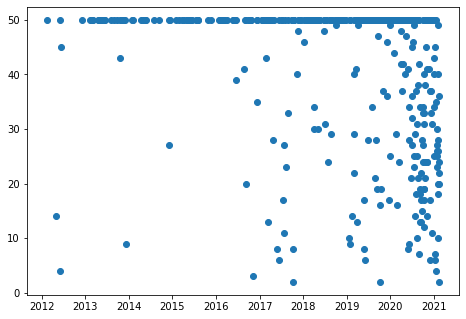

In [83]:
gb_scatter = plt.figure()
scatter_ax1 = gb_scatter.add_axes([1, 1, 1, 1])
scatter_ax1.scatter(groupbuy_df['topic_created'], groupbuy_df['num_posts'])

In [89]:
icodes = merged_df.loc[merged_df['board'] == '70'].sort_values('topic_created')[['info_code', 'topic_created']]
icodes['count'] = icodes.groupby('info_code').cumcount()
icodes.head(5)

,info_code,topic_created,count
440,PBT,2012-02-12 09:37:07,0
439,PBT,2012-04-27 08:57:15,1
438,PBT,2012-06-01 11:40:08,2
437,PBT,2012-06-06 10:57:04,3
436,PBT,2012-06-11 11:14:34,4


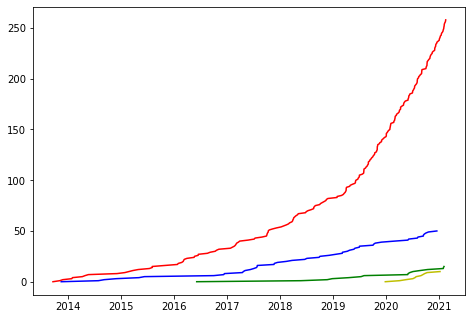

In [90]:
icode_figure = plt.figure()
icode_ax1 = icode_figure.add_axes([1, 1, 1, 1])
icode_ax1.plot(icodes.loc[icodes['info_code'] == 'GMK']['topic_created'], icodes.loc[icodes['info_code'] == 'GMK']['count'], 'r')
icode_ax1.plot(icodes.loc[icodes['info_code'] == 'SA']['topic_created'], icodes.loc[icodes['info_code'] == 'SA']['count'], 'b')
icode_ax1.plot(icodes.loc[icodes['info_code'] == 'IFK']['topic_created'], icodes.loc[icodes['info_code'] == 'IFK']['count'], 'y')
icode_ax1.plot(icodes.loc[icodes['info_code'] == 'EPBT']['topic_created'], icodes.loc[icodes['info_code'] == 'EPBT']['count'], 'g')


In [110]:
by_month = groupbuy_df.groupby(lambda x: groupbuy_df.loc[x]['topic_created'].date().replace(day=1))
monthly_count = by_month['topic_id'].count()
rolling_count = by_month['topic_id'].count().rolling(6, min_periods=3).mean()

Still not really sure how this rolling window stuff is supposed to work

In [189]:
by_day = groupbuy_df.groupby(lambda x: groupbuy_df.loc[x]['topic_created'].date()).count()['topic_id']
# .count()[['topic_id', 'topic_created']]
by_day.head()
pd.DatetimeIndex(by_day.index)
by_day = pd.DataFrame(by_day, index=pd.DatetimeIndex(by_day.index))
by_day.head()

,topic_id
2012-02-12,1
2012-04-27,1
2012-06-01,1
2012-06-06,1
2012-06-11,1


In [200]:
rolling_count2 = by_day.rolling(pd.Timedelta("30D")).sum()
rolling_count2.tail()

,topic_id
2021-02-07,16.0
2021-02-08,17.0
2021-02-11,18.0
2021-02-13,18.0
2021-02-14,18.0


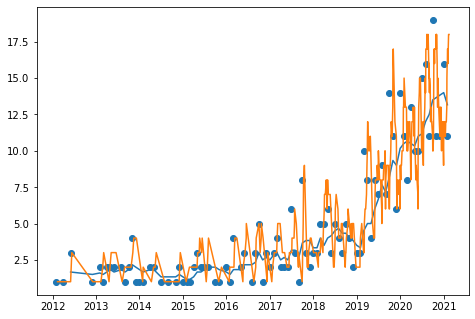

In [208]:
monthly_figure = plt.figure()
monthly_ax1 = monthly_figure.add_axes([1, 1, 1, 1])
monthly_ax1.scatter(monthly_count.index, monthly_count)
monthly_ax1.plot(rolling_count.index, rolling_count)
monthly_ax1.plot(rolling_count2)

<AxesSubplot:>

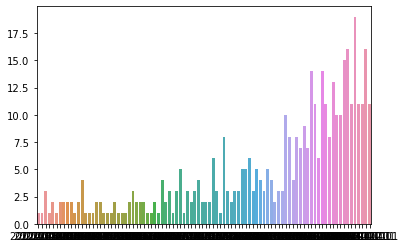

In [93]:
sns.barplot(x=by_month['topic_id'].count().index, y=by_month['topic_id'].count().values)

<AxesSubplot:>

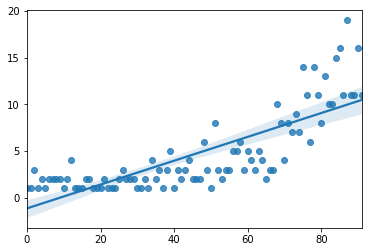

In [94]:
sns.regplot(x=by_month['topic_id'].count().reset_index().index, y=np.asarray(by_month['topic_id'].count().reset_index()['topic_id']))

In [95]:
by_month['topic_id'].count().reset_index().head()

,index,topic_id
0,2012-02-01,1
1,2012-04-01,1
2,2012-06-01,3
3,2012-12-01,1
4,2013-02-01,2


ConversionError: Failed to convert value(s) to axis units: array([(datetime.date(2012, 2, 1), 428), (datetime.date(2012, 4, 1), 427),
       (datetime.date(2012, 6, 1), 424), (datetime.date(2012, 6, 1), 425),
       (datetime.date(2012, 6, 1), 426),
       (datetime.date(2012, 12, 1), 423),
       (datetime.date(2013, 2, 1), 421), (datetime.date(2013, 2, 1), 422),
       (datetime.date(2013, 3, 1), 420), (datetime.date(2013, 4, 1), 418),
       (datetime.date(2013, 4, 1), 419), (datetime.date(2013, 5, 1), 416),
       (datetime.date(2013, 5, 1), 417), (datetime.date(2013, 6, 1), 414),
       (datetime.date(2013, 6, 1), 415), (datetime.date(2013, 8, 1), 412),
       (datetime.date(2013, 8, 1), 413), (datetime.date(2013, 9, 1), 411),
       (datetime.date(2013, 10, 1), 409),
       (datetime.date(2013, 10, 1), 410),
       (datetime.date(2013, 11, 1), 405),
       (datetime.date(2013, 11, 1), 406),
       (datetime.date(2013, 11, 1), 407),
       (datetime.date(2013, 11, 1), 408),
       (datetime.date(2013, 12, 1), 404),
       (datetime.date(2014, 1, 1), 403), (datetime.date(2014, 2, 1), 402),
       (datetime.date(2014, 4, 1), 400), (datetime.date(2014, 4, 1), 401),
       (datetime.date(2014, 5, 1), 398), (datetime.date(2014, 5, 1), 399),
       (datetime.date(2014, 7, 1), 397), (datetime.date(2014, 9, 1), 396),
       (datetime.date(2014, 11, 1), 395),
       (datetime.date(2014, 12, 1), 393),
       (datetime.date(2014, 12, 1), 394),
       (datetime.date(2015, 1, 1), 392), (datetime.date(2015, 2, 1), 391),
       (datetime.date(2015, 3, 1), 390), (datetime.date(2015, 4, 1), 388),
       (datetime.date(2015, 4, 1), 389), (datetime.date(2015, 5, 1), 385),
       (datetime.date(2015, 5, 1), 386), (datetime.date(2015, 5, 1), 387),
       (datetime.date(2015, 6, 1), 383), (datetime.date(2015, 6, 1), 384),
       (datetime.date(2015, 7, 1), 381), (datetime.date(2015, 7, 1), 382),
       (datetime.date(2015, 8, 1), 379), (datetime.date(2015, 8, 1), 380),
       (datetime.date(2015, 10, 1), 378),
       (datetime.date(2015, 11, 1), 377),
       (datetime.date(2016, 1, 1), 375), (datetime.date(2016, 1, 1), 376),
       (datetime.date(2016, 2, 1), 374), (datetime.date(2016, 3, 1), 370),
       (datetime.date(2016, 3, 1), 371), (datetime.date(2016, 3, 1), 372),
       (datetime.date(2016, 3, 1), 373), (datetime.date(2016, 5, 1), 368),
       (datetime.date(2016, 5, 1), 369), (datetime.date(2016, 6, 1), 365),
       (datetime.date(2016, 6, 1), 366), (datetime.date(2016, 6, 1), 367),
       (datetime.date(2016, 8, 1), 364), (datetime.date(2016, 9, 1), 361),
       (datetime.date(2016, 9, 1), 362), (datetime.date(2016, 9, 1), 363),
       (datetime.date(2016, 10, 1), 356),
       (datetime.date(2016, 10, 1), 357),
       (datetime.date(2016, 10, 1), 358),
       (datetime.date(2016, 10, 1), 359),
       (datetime.date(2016, 10, 1), 360),
       (datetime.date(2016, 11, 1), 355),
       (datetime.date(2016, 12, 1), 352),
       (datetime.date(2016, 12, 1), 353),
       (datetime.date(2016, 12, 1), 354),
       (datetime.date(2017, 1, 1), 350), (datetime.date(2017, 1, 1), 351),
       (datetime.date(2017, 2, 1), 347), (datetime.date(2017, 2, 1), 348),
       (datetime.date(2017, 2, 1), 349), (datetime.date(2017, 3, 1), 343),
       (datetime.date(2017, 3, 1), 344), (datetime.date(2017, 3, 1), 345),
       (datetime.date(2017, 3, 1), 346), (datetime.date(2017, 4, 1), 341),
       (datetime.date(2017, 4, 1), 342), (datetime.date(2017, 5, 1), 339),
       (datetime.date(2017, 5, 1), 340), (datetime.date(2017, 6, 1), 337),
       (datetime.date(2017, 6, 1), 338), (datetime.date(2017, 7, 1), 331),
       (datetime.date(2017, 7, 1), 332), (datetime.date(2017, 7, 1), 333),
       (datetime.date(2017, 7, 1), 334), (datetime.date(2017, 7, 1), 335),
       (datetime.date(2017, 7, 1), 336), (datetime.date(2017, 8, 1), 328),
       (datetime.date(2017, 8, 1), 329), (datetime.date(2017, 8, 1), 330),
       (datetime.date(2017, 9, 1), 327),
       (datetime.date(2017, 10, 1), 319),
       (datetime.date(2017, 10, 1), 320),
       (datetime.date(2017, 10, 1), 321),
       (datetime.date(2017, 10, 1), 322),
       (datetime.date(2017, 10, 1), 323),
       (datetime.date(2017, 10, 1), 324),
       (datetime.date(2017, 10, 1), 325),
       (datetime.date(2017, 10, 1), 326),
       (datetime.date(2017, 11, 1), 316),
       (datetime.date(2017, 11, 1), 317),
       (datetime.date(2017, 11, 1), 318),
       (datetime.date(2017, 12, 1), 314),
       (datetime.date(2017, 12, 1), 315),
       (datetime.date(2018, 1, 1), 311), (datetime.date(2018, 1, 1), 312),
       (datetime.date(2018, 1, 1), 313), (datetime.date(2018, 2, 1), 308),
       (datetime.date(2018, 2, 1), 309), (datetime.date(2018, 2, 1), 310),
       (datetime.date(2018, 3, 1), 303), (datetime.date(2018, 3, 1), 304),
       (datetime.date(2018, 3, 1), 305), (datetime.date(2018, 3, 1), 306),
       (datetime.date(2018, 3, 1), 307), (datetime.date(2018, 4, 1), 298),
       (datetime.date(2018, 4, 1), 299), (datetime.date(2018, 4, 1), 300),
       (datetime.date(2018, 4, 1), 301), (datetime.date(2018, 4, 1), 302),
       (datetime.date(2018, 5, 1), 292), (datetime.date(2018, 5, 1), 293),
       (datetime.date(2018, 5, 1), 294), (datetime.date(2018, 5, 1), 295),
       (datetime.date(2018, 5, 1), 296), (datetime.date(2018, 5, 1), 297),
       (datetime.date(2018, 6, 1), 289), (datetime.date(2018, 6, 1), 290),
       (datetime.date(2018, 6, 1), 291), (datetime.date(2018, 7, 1), 284),
       (datetime.date(2018, 7, 1), 285), (datetime.date(2018, 7, 1), 286),
       (datetime.date(2018, 7, 1), 287), (datetime.date(2018, 7, 1), 288),
       (datetime.date(2018, 8, 1), 280), (datetime.date(2018, 8, 1), 281),
       (datetime.date(2018, 8, 1), 282), (datetime.date(2018, 8, 1), 283),
       (datetime.date(2018, 9, 1), 277), (datetime.date(2018, 9, 1), 278),
       (datetime.date(2018, 9, 1), 279),
       (datetime.date(2018, 10, 1), 272),
       (datetime.date(2018, 10, 1), 273),
       (datetime.date(2018, 10, 1), 274),
       (datetime.date(2018, 10, 1), 275),
       (datetime.date(2018, 10, 1), 276),
       (datetime.date(2018, 11, 1), 268),
       (datetime.date(2018, 11, 1), 269),
       (datetime.date(2018, 11, 1), 270),
       (datetime.date(2018, 11, 1), 271),
       (datetime.date(2018, 12, 1), 266),
       (datetime.date(2018, 12, 1), 267),
       (datetime.date(2019, 1, 1), 263), (datetime.date(2019, 1, 1), 264),
       (datetime.date(2019, 1, 1), 265), (datetime.date(2019, 2, 1), 260),
       (datetime.date(2019, 2, 1), 261), (datetime.date(2019, 2, 1), 262),
       (datetime.date(2019, 3, 1), 250), (datetime.date(2019, 3, 1), 251),
       (datetime.date(2019, 3, 1), 252), (datetime.date(2019, 3, 1), 253),
       (datetime.date(2019, 3, 1), 254), (datetime.date(2019, 3, 1), 255),
       (datetime.date(2019, 3, 1), 256), (datetime.date(2019, 3, 1), 257),
       (datetime.date(2019, 3, 1), 258), (datetime.date(2019, 3, 1), 259),
       (datetime.date(2019, 4, 1), 242), (datetime.date(2019, 4, 1), 243),
       (datetime.date(2019, 4, 1), 244), (datetime.date(2019, 4, 1), 245),
       (datetime.date(2019, 4, 1), 246), (datetime.date(2019, 4, 1), 247),
       (datetime.date(2019, 4, 1), 248), (datetime.date(2019, 4, 1), 249),
       (datetime.date(2019, 5, 1), 238), (datetime.date(2019, 5, 1), 239),
       (datetime.date(2019, 5, 1), 240), (datetime.date(2019, 5, 1), 241),
       (datetime.date(2019, 6, 1), 230), (datetime.date(2019, 6, 1), 231),
       (datetime.date(2019, 6, 1), 232), (datetime.date(2019, 6, 1), 233),
       (datetime.date(2019, 6, 1), 234), (datetime.date(2019, 6, 1), 235),
       (datetime.date(2019, 6, 1), 236), (datetime.date(2019, 6, 1), 237),
       (datetime.date(2019, 7, 1), 223), (datetime.date(2019, 7, 1), 224),
       (datetime.date(2019, 7, 1), 225), (datetime.date(2019, 7, 1), 226),
       (datetime.date(2019, 7, 1), 227), (datetime.date(2019, 7, 1), 228),
       (datetime.date(2019, 7, 1), 229), (datetime.date(2019, 8, 1), 214),
       (datetime.date(2019, 8, 1), 215), (datetime.date(2019, 8, 1), 216),
       (datetime.date(2019, 8, 1), 217), (datetime.date(2019, 8, 1), 218),
       (datetime.date(2019, 8, 1), 219), (datetime.date(2019, 8, 1), 220),
       (datetime.date(2019, 8, 1), 221), (datetime.date(2019, 8, 1), 222),
       (datetime.date(2019, 9, 1), 207), (datetime.date(2019, 9, 1), 208),
       (datetime.date(2019, 9, 1), 209), (datetime.date(2019, 9, 1), 210),
       (datetime.date(2019, 9, 1), 211), (datetime.date(2019, 9, 1), 212),
       (datetime.date(2019, 9, 1), 213),
       (datetime.date(2019, 10, 1), 193),
       (datetime.date(2019, 10, 1), 194),
       (datetime.date(2019, 10, 1), 195),
       (datetime.date(2019, 10, 1), 196),
       (datetime.date(2019, 10, 1), 197),
       (datetime.date(2019, 10, 1), 198),
       (datetime.date(2019, 10, 1), 199),
       (datetime.date(2019, 10, 1), 200),
       (datetime.date(2019, 10, 1), 201),
       (datetime.date(2019, 10, 1), 202),
       (datetime.date(2019, 10, 1), 203),
       (datetime.date(2019, 10, 1), 204),
       (datetime.date(2019, 10, 1), 205),
       (datetime.date(2019, 10, 1), 206),
       (datetime.date(2019, 11, 1), 182),
       (datetime.date(2019, 11, 1), 183),
       (datetime.date(2019, 11, 1), 184),
       (datetime.date(2019, 11, 1), 185),
       (datetime.date(2019, 11, 1), 186),
       (datetime.date(2019, 11, 1), 187),
       (datetime.date(2019, 11, 1), 188),
       (datetime.date(2019, 11, 1), 189),
       (datetime.date(2019, 11, 1), 190),
       (datetime.date(2019, 11, 1), 191),
       (datetime.date(2019, 11, 1), 192),
       (datetime.date(2019, 12, 1), 176),
       (datetime.date(2019, 12, 1), 177),
       (datetime.date(2019, 12, 1), 178),
       (datetime.date(2019, 12, 1), 179),
       (datetime.date(2019, 12, 1), 180),
       (datetime.date(2019, 12, 1), 181),
       (datetime.date(2020, 1, 1), 162), (datetime.date(2020, 1, 1), 163),
       (datetime.date(2020, 1, 1), 164), (datetime.date(2020, 1, 1), 165),
       (datetime.date(2020, 1, 1), 166), (datetime.date(2020, 1, 1), 167),
       (datetime.date(2020, 1, 1), 168), (datetime.date(2020, 1, 1), 169),
       (datetime.date(2020, 1, 1), 170), (datetime.date(2020, 1, 1), 171),
       (datetime.date(2020, 1, 1), 172), (datetime.date(2020, 1, 1), 173),
       (datetime.date(2020, 1, 1), 174), (datetime.date(2020, 1, 1), 175),
       (datetime.date(2020, 2, 1), 151), (datetime.date(2020, 2, 1), 152),
       (datetime.date(2020, 2, 1), 153), (datetime.date(2020, 2, 1), 154),
       (datetime.date(2020, 2, 1), 155), (datetime.date(2020, 2, 1), 156),
       (datetime.date(2020, 2, 1), 157), (datetime.date(2020, 2, 1), 158),
       (datetime.date(2020, 2, 1), 159), (datetime.date(2020, 2, 1), 160),
       (datetime.date(2020, 2, 1), 161), (datetime.date(2020, 3, 1), 143),
       (datetime.date(2020, 3, 1), 144), (datetime.date(2020, 3, 1), 145),
       (datetime.date(2020, 3, 1), 146), (datetime.date(2020, 3, 1), 147),
       (datetime.date(2020, 3, 1), 148), (datetime.date(2020, 3, 1), 149),
       (datetime.date(2020, 3, 1), 150), (datetime.date(2020, 4, 1), 130),
       (datetime.date(2020, 4, 1), 131), (datetime.date(2020, 4, 1), 132),
       (datetime.date(2020, 4, 1), 133), (datetime.date(2020, 4, 1), 134),
       (datetime.date(2020, 4, 1), 135), (datetime.date(2020, 4, 1), 136),
       (datetime.date(2020, 4, 1), 137), (datetime.date(2020, 4, 1), 138),
       (datetime.date(2020, 4, 1), 139), (datetime.date(2020, 4, 1), 140),
       (datetime.date(2020, 4, 1), 141), (datetime.date(2020, 4, 1), 142),
       (datetime.date(2020, 5, 1), 120), (datetime.date(2020, 5, 1), 121),
       (datetime.date(2020, 5, 1), 122), (datetime.date(2020, 5, 1), 123),
       (datetime.date(2020, 5, 1), 124), (datetime.date(2020, 5, 1), 125),
       (datetime.date(2020, 5, 1), 126), (datetime.date(2020, 5, 1), 127),
       (datetime.date(2020, 5, 1), 128), (datetime.date(2020, 5, 1), 129),
       (datetime.date(2020, 6, 1), 110), (datetime.date(2020, 6, 1), 111),
       (datetime.date(2020, 6, 1), 112), (datetime.date(2020, 6, 1), 113),
       (datetime.date(2020, 6, 1), 114), (datetime.date(2020, 6, 1), 115),
       (datetime.date(2020, 6, 1), 116), (datetime.date(2020, 6, 1), 117),
       (datetime.date(2020, 6, 1), 118), (datetime.date(2020, 6, 1), 119),
       (datetime.date(2020, 7, 1), 95), (datetime.date(2020, 7, 1), 96),
       (datetime.date(2020, 7, 1), 97), (datetime.date(2020, 7, 1), 98),
       (datetime.date(2020, 7, 1), 99), (datetime.date(2020, 7, 1), 100),
       (datetime.date(2020, 7, 1), 101), (datetime.date(2020, 7, 1), 102),
       (datetime.date(2020, 7, 1), 103), (datetime.date(2020, 7, 1), 104),
       (datetime.date(2020, 7, 1), 105), (datetime.date(2020, 7, 1), 106),
       (datetime.date(2020, 7, 1), 107), (datetime.date(2020, 7, 1), 108),
       (datetime.date(2020, 7, 1), 109), (datetime.date(2020, 8, 1), 79),
       (datetime.date(2020, 8, 1), 80), (datetime.date(2020, 8, 1), 81),
       (datetime.date(2020, 8, 1), 82), (datetime.date(2020, 8, 1), 83),
       (datetime.date(2020, 8, 1), 84), (datetime.date(2020, 8, 1), 85),
       (datetime.date(2020, 8, 1), 86), (datetime.date(2020, 8, 1), 87),
       (datetime.date(2020, 8, 1), 88), (datetime.date(2020, 8, 1), 89),
       (datetime.date(2020, 8, 1), 90), (datetime.date(2020, 8, 1), 91),
       (datetime.date(2020, 8, 1), 92), (datetime.date(2020, 8, 1), 93),
       (datetime.date(2020, 8, 1), 94), (datetime.date(2020, 9, 1), 68),
       (datetime.date(2020, 9, 1), 69), (datetime.date(2020, 9, 1), 70),
       (datetime.date(2020, 9, 1), 71), (datetime.date(2020, 9, 1), 72),
       (datetime.date(2020, 9, 1), 73), (datetime.date(2020, 9, 1), 74),
       (datetime.date(2020, 9, 1), 75), (datetime.date(2020, 9, 1), 76),
       (datetime.date(2020, 9, 1), 77), (datetime.date(2020, 9, 1), 78),
       (datetime.date(2020, 10, 1), 49), (datetime.date(2020, 10, 1), 50),
       (datetime.date(2020, 10, 1), 51), (datetime.date(2020, 10, 1), 52),
       (datetime.date(2020, 10, 1), 53), (datetime.date(2020, 10, 1), 54),
       (datetime.date(2020, 10, 1), 55), (datetime.date(2020, 10, 1), 56),
       (datetime.date(2020, 10, 1), 57), (datetime.date(2020, 10, 1), 58),
       (datetime.date(2020, 10, 1), 59), (datetime.date(2020, 10, 1), 60),
       (datetime.date(2020, 10, 1), 61), (datetime.date(2020, 10, 1), 62),
       (datetime.date(2020, 10, 1), 63), (datetime.date(2020, 10, 1), 64),
       (datetime.date(2020, 10, 1), 65), (datetime.date(2020, 10, 1), 66),
       (datetime.date(2020, 10, 1), 67), (datetime.date(2020, 11, 1), 38),
       (datetime.date(2020, 11, 1), 39), (datetime.date(2020, 11, 1), 40),
       (datetime.date(2020, 11, 1), 41), (datetime.date(2020, 11, 1), 42),
       (datetime.date(2020, 11, 1), 43), (datetime.date(2020, 11, 1), 44),
       (datetime.date(2020, 11, 1), 45), (datetime.date(2020, 11, 1), 46),
       (datetime.date(2020, 11, 1), 47), (datetime.date(2020, 11, 1), 48),
       (datetime.date(2020, 12, 1), 27), (datetime.date(2020, 12, 1), 28),
       (datetime.date(2020, 12, 1), 29), (datetime.date(2020, 12, 1), 30),
       (datetime.date(2020, 12, 1), 31), (datetime.date(2020, 12, 1), 32),
       (datetime.date(2020, 12, 1), 33), (datetime.date(2020, 12, 1), 34),
       (datetime.date(2020, 12, 1), 35), (datetime.date(2020, 12, 1), 36),
       (datetime.date(2020, 12, 1), 37), (datetime.date(2021, 1, 1), 11),
       (datetime.date(2021, 1, 1), 12), (datetime.date(2021, 1, 1), 13),
       (datetime.date(2021, 1, 1), 14), (datetime.date(2021, 1, 1), 15),
       (datetime.date(2021, 1, 1), 16), (datetime.date(2021, 1, 1), 17),
       (datetime.date(2021, 1, 1), 18), (datetime.date(2021, 1, 1), 19),
       (datetime.date(2021, 1, 1), 20), (datetime.date(2021, 1, 1), 21),
       (datetime.date(2021, 1, 1), 22), (datetime.date(2021, 1, 1), 23),
       (datetime.date(2021, 1, 1), 24), (datetime.date(2021, 1, 1), 25),
       (datetime.date(2021, 1, 1), 26), (datetime.date(2021, 2, 1), 0),
       (datetime.date(2021, 2, 1), 1), (datetime.date(2021, 2, 1), 2),
       (datetime.date(2021, 2, 1), 3), (datetime.date(2021, 2, 1), 4),
       (datetime.date(2021, 2, 1), 5), (datetime.date(2021, 2, 1), 6),
       (datetime.date(2021, 2, 1), 7), (datetime.date(2021, 2, 1), 8),
       (datetime.date(2021, 2, 1), 9), (datetime.date(2021, 2, 1), 10)],
      dtype=object)

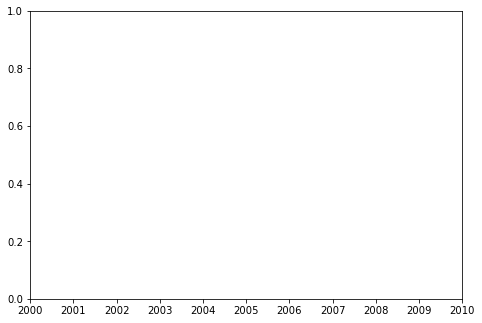

In [96]:
monthly_figure = plt.figure()
monthly_ax1 = monthly_figure.add_axes([1, 1, 1, 1])
monthly_ax1.plot(by_month['replies'].rolling(3).mean().index, np.asarray(by_month['replies'].rolling(3).mean().values))